In [1]:
import re, os
import pathlib as pl
import sys
import matplotlib.pyplot as plt

In [2]:
#set home and allow for local imports
home = pl.Path(os.getcwd()).parent
sys.path.append(str(home))
from src.core import *

In [3]:
#set variables
inputs = home/'data'/'input'
outputs = home/'data'/'output'
gage_table = pd.read_excel(inputs/'gages.xlsx', 'BasinChar_all_HUCs_Final')


In [4]:
#additional variables
flow_folder = outputs/'17c'
transfer_variables = ['TDA_SqMi','CDA_SqMi','HUC8']

In [5]:
g_tables = glob.glob(str(flow_folder)+'/*.parquet')

In [6]:
gage_analysis_data = concat_gage_tables(gage_table,g_tables,transfer_variables)

In [7]:
hundred_year = gage_analysis_data.loc[gage_analysis_data['Percent Chance Exceedance'] == 1.0]

In [8]:
hundred_year

,"Computed Curve FLOW, CFS",Variance Log(EMA),Percent Chance Exceedance,"Confidence Limits 0.05 FLOW, CFS","Confidence Limits 0.95 FLOW, CFS",GID,TDA_SqMi,CDA_SqMi,HUC8,"Confidence Limits 0.84 FLOW, CFS","Confidence Limits 0.16 FLOW, CFS","Confidence Limits 0.86 FLOW, CFS","Confidence Limits 0.14 FLOW, CFS"
2,6147.2,0.034899,1.0,16167.1,3447.1,6382200,5.295270,5.295270,10120105,NaN,NaN,NaN,NaN
2,609.3,0.071370,1.0,NaN,NaN,6396490,24.062500,24.062500,10120108,362.9,1317.2,NaN,NaN
2,1876.0,0.010711,1.0,NaN,NaN,6399700,7.351190,7.351190,10120108,1108.7,1878.7,NaN,NaN
2,25185.7,0.423545,1.0,NaN,NaN,6400875,188.076004,188.076004,10120106,7234.2,177954.6,NaN,NaN
2,1750.0,0.129272,1.0,NaN,NaN,6443200,7.552270,7.552270,10140201,860.1,4774.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,17998.7,0.009408,1.0,NaN,NaN,6888030,289.338989,289.338989,10270102,14879.9,23709.5,NaN,NaN
2,15658.3,0.008169,1.0,NaN,NaN,6889160,49.825298,49.825298,10270102,13025.8,19885.3,NaN,NaN
2,12218.7,0.008732,1.0,NaN,NaN,6889180,80.735703,80.735703,10270102,12024.4,19646.6,NaN,NaN
2,2014.8,0.025481,1.0,NaN,NaN,6890560,1.921690,1.921690,10270103,1487.7,3302.4,NaN,NaN


<Axes: xlabel='CDA_SqMi', ylabel='Computed Curve FLOW, CFS'>

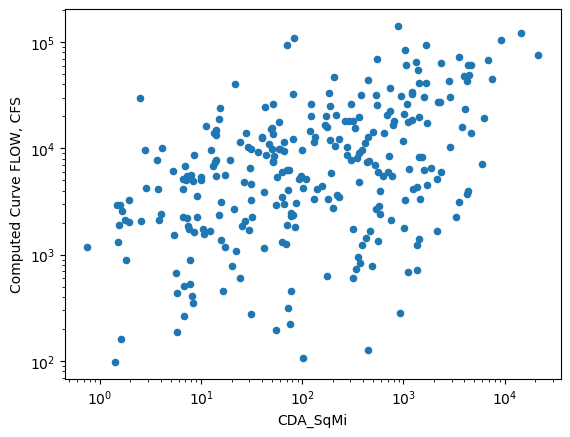

In [9]:
hundred_year.plot.scatter(x='CDA_SqMi',y='Computed Curve FLOW, CFS',logy=True,logx=True)